In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('train_set.csv')

In [3]:
df

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
0,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,Calendar,16158
1,2013,4,Community Health,DPH,Public Health,39,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784
2,2015,6,General Administration & Finance,ASR,Assessor/Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708
3,2016,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323
4,2013,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287831,2016,3,Human Welfare & Neighborhood Development,DSS,Human Services,535,"SEIU - Human Services, Local 1021",Human Services,Senior Eligibility Worker,9610,78980,30115,13068.80,Fiscal,147079
287832,2015,5,Culture & Recreation,LIB,Public Library,790,"SEIU - Miscellaneous, Local 1021",Library,Librarian 1,790,30704,0,5465.57,Calendar,40174
287833,2014,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,6,"Electrical Workers, Local 6",Journeyman Trade,Electronic Maintenance Tech,38352,104451,0,13054.94,Calendar,164669
287834,2013,1,Public Protection,JUV,Juvenile Probation,250,"SEIU - Health Workers, Local 1021",Housekeeping & Laundry,Porter,29266,14425,0,4051.90,Calendar,19594


In [4]:
df.isna().sum()

Year                   0
OGC                    0
OG                     0
DC                     0
Dept                   0
UC                     0
Union                 36
JF                    38
Job                    0
EI                     0
Salaries               0
Overtime               0
H/D                    0
YT                     0
Total_Compensation     0
dtype: int64

C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salaries', ylabel='Total_Compensation'>

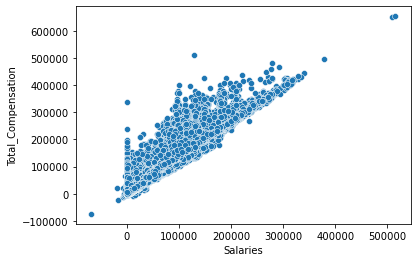

In [5]:
sns.scatterplot(df['Salaries'],df['Total_Compensation'])

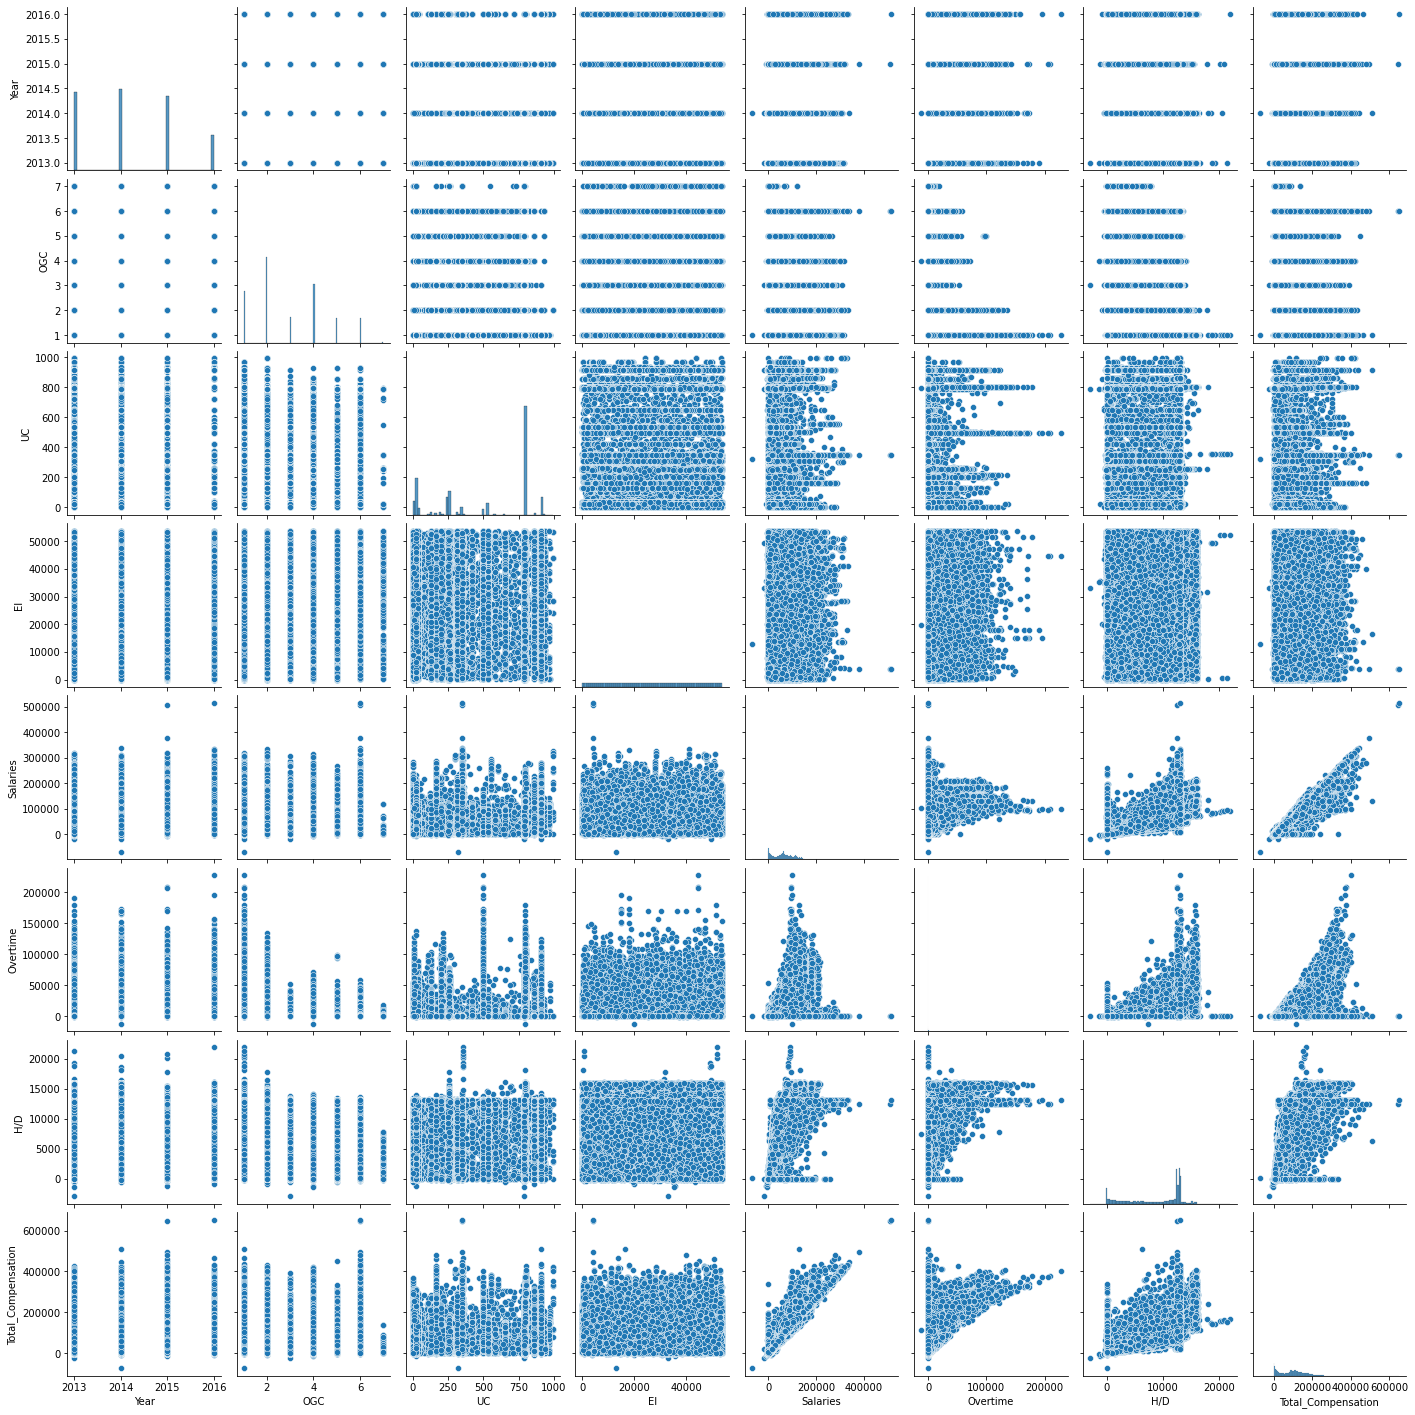

In [6]:
sns.pairplot(df)

In [7]:
df.corr()

,Year,OGC,UC,EI,Salaries,Overtime,H/D,Total_Compensation
Year,1.000000,-0.005849,-0.003789,0.002081,0.004376,0.015024,-0.013705,0.005986
OGC,-0.005849,1.000000,-0.006246,0.002137,-0.217733,-0.303169,-0.233033,-0.270160
UC,-0.003789,-0.006246,1.000000,-0.001493,-0.047408,0.059816,-0.073297,-0.032338
EI,0.002081,0.002137,-0.001493,1.000000,-0.004385,-0.001167,-0.003472,-0.003966
Salaries,0.004376,-0.217733,-0.047408,-0.004385,1.000000,0.271575,0.774898,0.972585
Overtime,0.015024,-0.303169,0.059816,-0.001167,0.271575,1.000000,0.312468,0.453497
H/D,-0.013705,-0.233033,-0.073297,-0.003472,0.774898,0.312468,1.000000,0.806283
Total_Compensation,0.005986,-0.270160,-0.032338,-0.003966,0.972585,0.453497,0.806283,1.000000


### Total Compensation has the highest correlation with the Salaries followed by H/D and Overtime alone , so we would be considering only them for  modelling

In [8]:
df=df[['Salaries','Overtime','H/D','Total_Compensation']]

In [9]:
x=df.drop('Total_Compensation',axis=1)
y=df['Total_Compensation']

In [10]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [11]:
from sklearn.model_selection import train_test_split
xtrain ,xtest,ytrain,ytest=train_test_split(x,y,random_state=42)

In [12]:
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [14]:
model=LinearRegression()
model.fit(xtrain,ytrain)
train_pred=model.predict(xtrain)
test_pred=model.predict(xtest)
print('-'*50)
print('Train acc',r2_score(ytrain,train_pred))
print('Test acc',r2_score(ytest,test_pred))
print('-'*50)

--------------------------------------------------
Train acc 0.9872134590223944
Test acc 0.9873020626518911
--------------------------------------------------
